In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random


In [35]:
import os
os.getcwd()

'/Users/we/Downloads/업무/buy it again_분석 '

In [ ]:
./chunk/

In [39]:
chunk = {}
for i in range(13):
    chunk[i] = pd.read_csv('./chunk/chunk{}.csv'.format(i))


In [41]:
chunk[12].tail()

,Unnamed: 0,biz_dt,m_id,order_price,prod_no,old_admin_category_id,serv_cd
3321035,123321035,2018-09-28 17:00:21,"18,342,102","3,170","100,913,544","237,040,103",2
3321036,123321036,2018-09-28 17:00:21,"18,342,102","3,800","100,913,555","237,040,103",2
3321037,123321037,2018-09-28 17:00:22,"24,137,068","1,699,000","101,984,766","233,040,120",2
3321038,123321038,2018-09-28 17:00:25,"5,357,454","25,000","110,485,856","240,010,305",2
3321039,123321039,2018-09-28 17:00:27,"21,865,461","55,900","100,371,485","233,080,119",2


In [42]:
sum(chunk[12].old_admin_category_id == '240,040,102')

45373

In [43]:
chunk[12][chunk[12].old_admin_category_id == '240,040,102'].tail()

,Unnamed: 0,biz_dt,m_id,order_price,prod_no,old_admin_category_id,serv_cd
3320947,123320947,2018-09-28 16:59:09,"10,836,600","16,900","4,016,336","240,040,102",1
3320951,123320951,2018-09-28 16:59:09,"5,992,663","12,500","3,216,354","240,040,102",1
3321009,123321009,2018-09-28 16:59:52,"1,715,170","15,800","100,000,111","240,040,102",2
3321019,123321019,2018-09-28 17:00:07,"14,752,165","18,900","100,000,109","240,040,102",2
3321020,123321020,2018-09-28 17:00:07,"14,752,165","11,500","100,000,112","240,040,102",2


In [46]:
water = chunk[12][chunk[12].old_admin_category_id == '240,040,102']

In [51]:
water.shape

(45373, 7)

---

- 연습

In [52]:
y = pd.DataFrame()

In [57]:
x = pd.DataFrame({'a':[1,2,3], 'b':[4,5,6]})

In [58]:
x

,a,b
0,1,4
1,2,5
2,3,6


In [59]:
pd.concat([y,x])

,a,b
0,1,4
1,2,5
2,3,6


---

- WATER데이터 빼올거야

In [68]:
water = pd.DataFrame()

In [69]:
water

""


In [70]:
water = pd.DataFrame()
for i in range(13):
  water = pd.concat([water, chunk[i][chunk[i].old_admin_category_id == '240,040,102']])

In [71]:
water.shape

(1833273, 7)

In [72]:
water.head()

,Unnamed: 0,biz_dt,m_id,order_price,prod_no,old_admin_category_id,serv_cd
76,76,2018-01-01 00:00:18,"2,363,189","8,900","1,286,468","240,040,102",1
114,114,2018-01-01 00:00:29,"5,093,799","8,900","1,700,020","240,040,102",1
225,225,2018-01-01 00:00:54,"23,526,491","35,000","1,524,740","240,040,102",1
256,256,2018-01-01 00:01:01,"1,721,092","10,900","1,272,131","240,040,102",1
278,278,2018-01-01 00:01:08,"7,469,033","11,900","2,178,079","240,040,102",1


In [73]:
water.tail()

,Unnamed: 0,biz_dt,m_id,order_price,prod_no,old_admin_category_id,serv_cd
3320947,123320947,2018-09-28 16:59:09,"10,836,600","16,900","4,016,336","240,040,102",1
3320951,123320951,2018-09-28 16:59:09,"5,992,663","12,500","3,216,354","240,040,102",1
3321009,123321009,2018-09-28 16:59:52,"1,715,170","15,800","100,000,111","240,040,102",2
3321019,123321019,2018-09-28 17:00:07,"14,752,165","18,900","100,000,109","240,040,102",2
3321020,123321020,2018-09-28 17:00:07,"14,752,165","11,500","100,000,112","240,040,102",2


In [75]:
filter = pd.to_datetime('2018-08-01')

In [79]:
x['c'] = x['b']

In [81]:
x['b']

0    4
1    5
2    6
Name: b, dtype: int64

In [80]:
x

,a,b,c
0,1,4,4
1,2,5,5
2,3,6,6


In [82]:
water['biz_dt'] = pd.to_datetime(water['biz_dt'])

In [83]:
water_train = water[water.biz_dt < filter]

In [86]:
water_test = water[water.biz_dt >= filter]

In [84]:
water_train.shape

(1449881, 7)

In [87]:
water_test.shape

(383392, 7)

In [88]:
water_train.shape[0] + water_test.shape[0] == water.shape[0]

True

---

---

In [89]:
water_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1449881 entries, 76 to 9110323
Data columns (total 7 columns):
Unnamed: 0               1449881 non-null int64
biz_dt                   1449881 non-null datetime64[ns]
m_id                     1449881 non-null object
order_price              1449881 non-null object
prod_no                  1449881 non-null object
old_admin_category_id    1449881 non-null object
serv_cd                  1449881 non-null int64
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 88.5+ MB


In [90]:
pd.to_datetime('2018-01-01') - pd.to_datetime('2018-01-02')

Timedelta('-1 days +00:00:00')

In [92]:
water_train.shape[0]  # 전체 약 145만건의 구매이력 

1449881

In [94]:
water_train.m_id.nunique() # 이 생수 카테고리에 약 60만명의 구매이력이 있다..!

595333

---

- 연습

In [12]:
a = water.iloc[1000000]['biz_dt'] - water.iloc[0]['biz_dt']

In [13]:
a

Timedelta('156 days 14:42:39')

In [14]:
a.days

156

In [15]:
ww = water.iloc[:10]

In [16]:
ww

,Unnamed: 0,biz_dt,m_id,order_price,prod_no,old_admin_category_id,serv_cd
76,76,2018-01-01 00:00:18,"2,363,189","8,900","1,286,468","240,040,102",1
114,114,2018-01-01 00:00:29,"5,093,799","8,900","1,700,020","240,040,102",1
225,225,2018-01-01 00:00:54,"23,526,491","35,000","1,524,740","240,040,102",1
256,256,2018-01-01 00:01:01,"1,721,092","10,900","1,272,131","240,040,102",1
278,278,2018-01-01 00:01:08,"7,469,033","11,900","2,178,079","240,040,102",1
293,293,2018-01-01 00:01:10,"22,667,175","10,900","2,729,517","240,040,102",1
342,342,2018-01-01 00:01:18,"23,644,729","11,900","2,178,079","240,040,102",1
386,386,2018-01-01 00:01:22,"17,102,366","8,900","2,279,023","240,040,102",1
478,478,2018-01-01 00:01:35,"7,536,506","19,350","1,513,471","240,040,102",1
507,507,2018-01-01 00:01:37,"18,659,361","21,900","2,178,079","240,040,102",1


In [17]:
ww.sort_values(by = 'biz_dt', ascending = False)

,Unnamed: 0,biz_dt,m_id,order_price,prod_no,old_admin_category_id,serv_cd
507,507,2018-01-01 00:01:37,"18,659,361","21,900","2,178,079","240,040,102",1
478,478,2018-01-01 00:01:35,"7,536,506","19,350","1,513,471","240,040,102",1
386,386,2018-01-01 00:01:22,"17,102,366","8,900","2,279,023","240,040,102",1
342,342,2018-01-01 00:01:18,"23,644,729","11,900","2,178,079","240,040,102",1
293,293,2018-01-01 00:01:10,"22,667,175","10,900","2,729,517","240,040,102",1
278,278,2018-01-01 00:01:08,"7,469,033","11,900","2,178,079","240,040,102",1
256,256,2018-01-01 00:01:01,"1,721,092","10,900","1,272,131","240,040,102",1
225,225,2018-01-01 00:00:54,"23,526,491","35,000","1,524,740","240,040,102",1
114,114,2018-01-01 00:00:29,"5,093,799","8,900","1,700,020","240,040,102",1
76,76,2018-01-01 00:00:18,"2,363,189","8,900","1,286,468","240,040,102",1


---

- unique한 MEMBER ID불러와

In [95]:
mid = water_train.m_id.unique()

In [96]:
len(mid)

595333

In [97]:
mid.shape

(595333,)

In [98]:
mid[1000]

'1,820,602'

In [99]:
water_train[water_train.m_id == water_train.m_id.unique()[1]]

,Unnamed: 0,biz_dt,m_id,order_price,prod_no,old_admin_category_id,serv_cd
114,114,2018-01-01 00:00:29,"5,093,799","8,900","1,700,020","240,040,102",1
7844323,17844323,2018-02-07 16:36:46,"5,093,799","5,900","1,603,302","240,040,102",1
4022351,54022351,2018-04-28 17:29:04,"5,093,799","7,900","3,407,791","240,040,102",1


-> 이런식으로

---

In [100]:
water_train.m_id.unique()[0]

'2,363,189'

In [101]:
sum(water_train.m_id== '2,363,189')

1

In [253]:
import time

start_time = time.time()

c = {}
t = []
for i in range(len(water_train.m_id.unique()[:10])):
    c[i] = water_train[water_train.m_id == water_train.m_id.unique()[i]].sort_values(by = 'biz_dt', ascending = False)
    for j in range(c[i].shape[0]-1):
        
        t.append((c[i].iloc[j]['biz_dt'] - c[i].iloc[j+1]['biz_dt']).days) #밑의 if문이랑 같은 결과야(해본결과, len가 1이면 iiappend안해줘)

        
elapsed_time = time.time() - start_time
print(elapsed_time)

8.884664058685303


비교

In [240]:
c[10] = water_train.biz_dt[water_train.m_id == water_train.m_id.unique()[10]].sort_values(ascending = False)

In [241]:
c[10]

693727   2018-04-02 01:32:01
563      2018-01-01 00:01:43
Name: biz_dt, dtype: datetime64[ns]

In [243]:
c[10].reset_index(drop=True)

0   2018-04-02 01:32:01
1   2018-01-01 00:01:43
Name: biz_dt, dtype: datetime64[ns]

In [246]:
for i in range(c[10].shape[0]-1):
    print(i)

0


In [250]:
# 오류야
c[10][0:1]-c[10][1:2]

563      NaT
693727   NaT
Name: biz_dt, dtype: timedelta64[ns]

In [251]:
c[10].iloc[1]

Timestamp('2018-01-01 00:01:43')

In [244]:
for j in range(c[10].shape[0]-1):
        
    t.append((c[10][j] - c[10][j+1]).days) #밑의 if문이랑 같은 결과야(해본결과, len가 1이면 iiappend안해줘)

KeyError: 0

In [252]:
import time

start_time = time.time()

c = {}
t = []
for i in range(len(water_train.m_id.unique()[:10])):
    c[i] = water_train.biz_dt[water_train.m_id == water_train.m_id.unique()[i]].sort_values(ascending = False)
    c[i].reset_index(drop=True)
    for j in range(c[i].shape[0]-1):
        
        t.append((c[i].iloc[j] - c[i].iloc[j+1]).days) #밑의 if문이랑 같은 결과야(해본결과, len가 1이면 iiappend안해줘)

        
elapsed_time = time.time() - start_time
print(elapsed_time)

8.868502140045166


In [215]:
c[2]

,Unnamed: 0,biz_dt,m_id,order_price,prod_no,old_admin_category_id,serv_cd
9660568,89660568,2018-07-11 18:01:01,"23,526,491","35,000","1,524,740","240,040,102",1
3862268,83862268,2018-07-01 23:09:22,"23,526,491","17,500","1,524,740","240,040,102",1
225,225,2018-01-01 00:00:54,"23,526,491","35,000","1,524,740","240,040,102",1


In [234]:
c[2].order_price == '17,500'

pandas.core.series.Series

In [232]:
c[2][c[2].order_price == '17,500']

,Unnamed: 0,biz_dt,m_id,order_price,prod_no,old_admin_category_id,serv_cd
3862268,83862268,2018-07-01 23:09:22,"23,526,491","17,500","1,524,740","240,040,102",1


In [230]:
c[2][[False,True,False]]

,Unnamed: 0,biz_dt,m_id,order_price,prod_no,old_admin_category_id,serv_cd
3862268,83862268,2018-07-01 23:09:22,"23,526,491","17,500","1,524,740","240,040,102",1


In [228]:
c[2]['biz_dt'][False,True,False]

KeyError: (False, True, False)

# ***

In [237]:
c[2]['biz_dt'].reset_index(drop=True)

0   2018-07-11 18:01:01
1   2018-07-01 23:09:22
2   2018-01-01 00:00:54
Name: biz_dt, dtype: datetime64[ns]

In [ ]:
c[2]['biz_dt'].reset_index(drop=True).sort_values(ascending=False)

# ***

In [222]:
c[2]['biz_dt'].reset_index(drop=True)[0]

Timestamp('2018-07-11 18:01:01')

---

In [218]:
c[2]['biz_dt'][9660568]

Timestamp('2018-07-11 18:01:01')

In [189]:
c[2]['biz_dt'][0:1]

9660568   2018-07-11 18:01:01
Name: biz_dt, dtype: datetime64[ns]

In [211]:
xxx = c[2].biz_dt

In [212]:
xxx

9660568   2018-07-11 18:01:01
3862268   2018-07-01 23:09:22
225       2018-01-01 00:00:54
Name: biz_dt, dtype: datetime64[ns]

In [ ]:
xxx.

In [213]:
xxx = (xxx.values[0]-xxx.values[1])

In [214]:
xxx

numpy.timedelta64(845499000000000,'ns')

In [192]:
c[2].biz_dt[0:1]

9660568   2018-07-11 18:01:01
Name: biz_dt, dtype: datetime64[ns]

In [187]:
c[2][['biz_dt']]

,biz_dt
9660568,2018-07-11 18:01:01
3862268,2018-07-01 23:09:22
225,2018-01-01 00:00:54


In [105]:
x = [1,2,3]

In [110]:
[i+(i+1) for i in x]

[3, 5, 7]

In [122]:
a = {'x':[1,2,3]}

In [123]:
a = pd.DataFrame(a)

In [124]:
a.columns

Index(['x'], dtype='object')

In [125]:
a.x

0    1
1    2
2    3
Name: x, dtype: int64

In [131]:
gen = (i**2 for i in a.x)

In [132]:
aa = []

In [133]:
aa.append(next(gen))

In [134]:
aa

[1]

In [135]:
aa.append(next(gen))

In [136]:
aa

[1, 4]

In [137]:
aa.append(next(gen))

In [138]:
aa

[1, 4, 9]

In [139]:
a

,x
0,1
1,2
2,3


In [141]:
a['x'][0]

1

In [142]:
water_train.tail()

,Unnamed: 0,biz_dt,m_id,order_price,prod_no,old_admin_category_id,serv_cd
9109833,99109833,2018-07-31 23:59:15,"14,664,716","9,900","3,130,860","240,040,102",1
9109899,99109899,2018-07-31 23:59:22,"2,787,900","15,500","100,000,108","240,040,102",2
9109925,99109925,2018-07-31 23:59:24,"1,572,198","5,500","101,649,212","240,040,102",2
9110174,99110174,2018-07-31 23:59:44,"2,620,503","5,500","101,649,212","240,040,102",2
9110323,99110323,2018-07-31 23:59:57,"1,277,772","5,900","1,603,302","240,040,102",1


In [144]:
tail = water_train.tail()

In [145]:
tail

,Unnamed: 0,biz_dt,m_id,order_price,prod_no,old_admin_category_id,serv_cd
9109833,99109833,2018-07-31 23:59:15,"14,664,716","9,900","3,130,860","240,040,102",1
9109899,99109899,2018-07-31 23:59:22,"2,787,900","15,500","100,000,108","240,040,102",2
9109925,99109925,2018-07-31 23:59:24,"1,572,198","5,500","101,649,212","240,040,102",2
9110174,99110174,2018-07-31 23:59:44,"2,620,503","5,500","101,649,212","240,040,102",2
9110323,99110323,2018-07-31 23:59:57,"1,277,772","5,900","1,603,302","240,040,102",1


In [146]:
tail['biz_dt']

9109833   2018-07-31 23:59:15
9109899   2018-07-31 23:59:22
9109925   2018-07-31 23:59:24
9110174   2018-07-31 23:59:44
9110323   2018-07-31 23:59:57
Name: biz_dt, dtype: datetime64[ns]

In [148]:
tail['biz_dt'][0:1]

9109833   2018-07-31 23:59:15
Name: biz_dt, dtype: datetime64[ns]

In [155]:
tail.iloc[1]

Unnamed: 0                          99109899
biz_dt                   2018-07-31 23:59:22
m_id                               2,787,900
order_price                           15,500
prod_no                          100,000,108
old_admin_category_id            240,040,102
serv_cd                                    2
Name: 9109899, dtype: object

In [156]:
tail.iloc[1]['biz_dt']

pandas._libs.tslibs.timestamps.Timestamp

In [158]:
tail[0:1]['biz_dt']

9109833   2018-07-31 23:59:15
Name: biz_dt, dtype: datetime64[ns]

In [181]:
import time
start_time = time.time()

c = {}

for i in range(len(water_train.m_id.unique()[:10])):
    c[i] = water_train[water_train.m_id == water_train.m_id.unique()[i]].sort_values(by = 'biz_dt', ascending = False)
    
    #gen = (i**2 for i in a.x)
    t.append([(c[i].iloc[j]['biz_dt'] - c[i].iloc[j+1]['biz_dt']).days for j in range(c[i].shape[0]-1)])
    #t.append((c[i].iloc[j]['biz_dt'] - c[i].iloc[j+1]['biz_dt']).days) #밑의 if문이랑 같은 결과야(해본결과, len가 1이면 iiappend안해줘)

            
elapsed_time = time.time() - start_time
print(elapsed_time)

8.84247899055481


In [174]:
t

[136, [], [80, 37], [9, 181]]

In [162]:
c[2] = water_train[water_train.m_id == water_train.m_id.unique()[2]].sort_values(by = 'biz_dt', ascending = False)

In [163]:
c[2]

,Unnamed: 0,biz_dt,m_id,order_price,prod_no,old_admin_category_id,serv_cd
9660568,89660568,2018-07-11 18:01:01,"23,526,491","35,000","1,524,740","240,040,102",1
3862268,83862268,2018-07-01 23:09:22,"23,526,491","17,500","1,524,740","240,040,102",1
225,225,2018-01-01 00:00:54,"23,526,491","35,000","1,524,740","240,040,102",1


In [168]:
[(c[2].iloc[j]['biz_dt'] - c[2].iloc[j+1]['biz_dt']).days for j in range(c[2].shape[0]-1)]

[9, 181]

In [164]:
gen = ((c[2].iloc[j]['biz_dt'] - c[2].iloc[j+1]['biz_dt']).days for j in range(c[2].shape[0]-1))

In [165]:
next(gen)

9

In [166]:
next(gen)

181

In [167]:
next(gen)

StopIteration: 

In [175]:
c[2]

,Unnamed: 0,biz_dt,m_id,order_price,prod_no,old_admin_category_id,serv_cd
9660568,89660568,2018-07-11 18:01:01,"23,526,491","35,000","1,524,740","240,040,102",1
3862268,83862268,2018-07-01 23:09:22,"23,526,491","17,500","1,524,740","240,040,102",1
225,225,2018-01-01 00:00:54,"23,526,491","35,000","1,524,740","240,040,102",1


In [ ]:
c[2]

In [178]:
c[2].'biz_dt'.shift()

SyntaxError: invalid syntax (<ipython-input-178-7ba79c551a77>, line 1)

In [ ]:
t = pd.DataFrame(users)
users.to_csv('users.csv')

In [30]:
t

[80,
 37,
 34,
 24,
 12,
 25,
 22,
 31,
 19,
 7,
 13,
 12,
 16,
 11,
 19,
 7,
 53,
 85,
 24,
 6,
 9,
 6,
 12,
 9,
 9,
 9,
 4,
 6,
 29,
 32,
 34,
 34,
 31]

In [124]:
t

[80,
 37,
 34,
 24,
 12,
 25,
 22,
 31,
 19,
 7,
 13,
 12,
 16,
 11,
 19,
 7,
 53,
 85,
 24,
 6,
 9,
 6,
 12,
 9,
 9,
 9,
 4,
 6,
 29,
 32,
 34,
 34,
 31,
 91,
 6,
 9,
 18,
 11,
 12,
 10,
 11,
 18,
 18,
 19,
 11,
 7,
 6,
 6,
 7,
 7,
 6,
 7,
 6,
 5,
 0,
 0,
 7,
 7,
 6,
 7,
 7,
 6,
 12,
 10,
 6,
 7,
 6,
 7,
 6,
 30,
 29,
 30,
 59,
 17,
 29,
 31,
 27,
 31,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 30,
 30,
 32,
 21,
 35,
 30,
 88,
 32,
 91,
 59,
 31,
 0,
 15,
 14,
 31,
 0,
 26,
 32,
 10,
 11,
 0,
 18,
 15,
 14,
 12,
 10,
 7,
 9,
 18,
 15,
 15,
 0,
 2,
 46,
 89,
 17,
 65,
 15,
 106,
 43,
 61,
 59,
 61,
 9,
 3,
 0,
 37,
 0,
 29,
 41,
 19,
 0,
 30,
 13,
 31,
 5,
 24,
 59,
 30,
 12,
 4,
 18,
 2,
 80,
 14,
 0,
 0,
 52,
 10,
 40,
 22,
 41,
 48,
 102,
 27,
 15,
 24,
 11,
 16,
 14,
 16,
 12,
 58,
 93,
 53,
 43,
 57,
 14,
 46,
 59,
 33,
 61,
 62,
 0,
 38,
 22,
 23,
 35,
 93,
 2,
 31,
 29,
 5,
 25,
 6,
 21,
 31,
 136]

In [130]:
len(t)

196

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1196c7550>]],
      dtype=object)

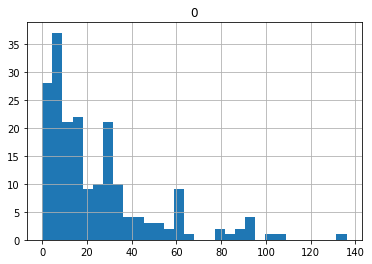

In [131]:
pd.DataFrame(t).hist(bins=30)